<a href="https://colab.research.google.com/github/AayushPaigwar/Deep-Learning-Fashion-MINST/blob/master/Deep_Learning_Fashion_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Deep Learning- Fashion MNIST Data Classification**

**1) IMPORTING NECESSARY LIBRARIES**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Loading Fashion MNIST data

In [29]:
(X_train, y_train),(X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [30]:
X_train.shape,"------", y_train.shape ,"------",X_test.shape, "------", y_test.shape

((60000, 28, 28),
 '------',
 (60000,),
 '------',
 (10000, 28, 28),
 '------',
 (10000,))

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [32]:
y_train[0]

9

In [33]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

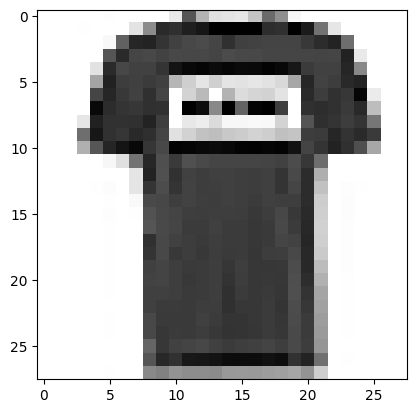

In [34]:
plt.imshow(X_train[1],cmap= 'Greys')

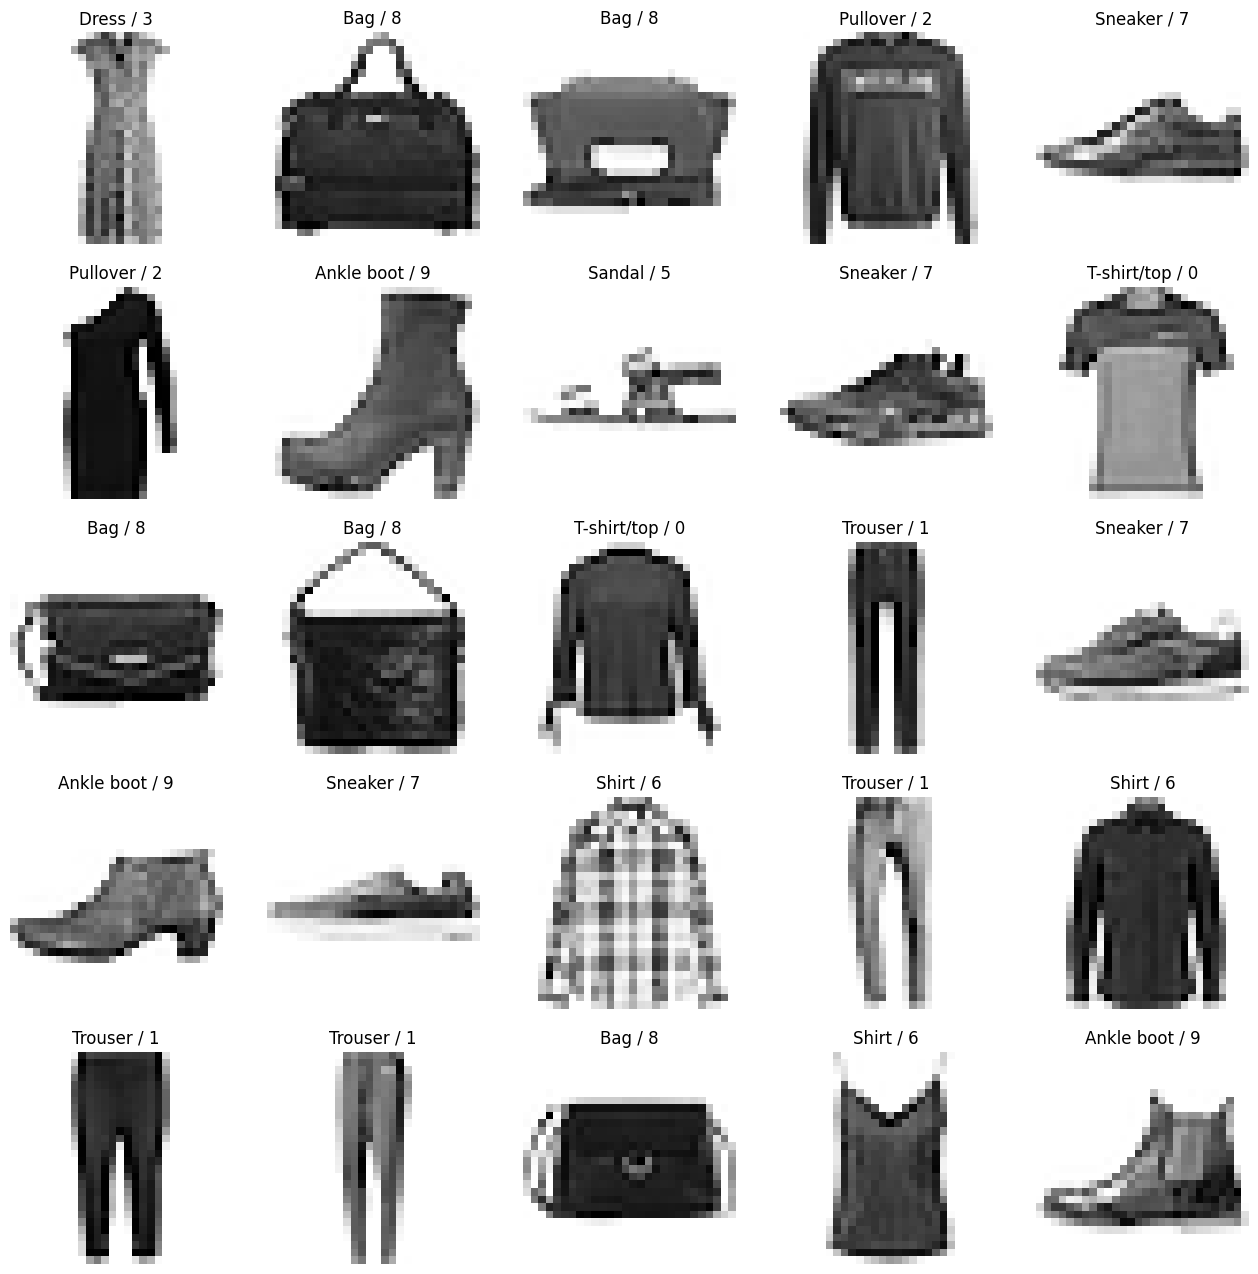

In [35]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [36]:
X_train.ndim

3

In [37]:
X_train = np.expand_dims(X_train,-1)

In [38]:
X_train.ndim

4

In [39]:
X_test=np.expand_dims(X_test,-1)

###FEATURE SCALING

In [40]:
X_train = X_train/255
X_test= X_test/255

### SPLIT DATASET

In [41]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [42]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

##**3) BUILDING CNN MODEL**

In [43]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size= 3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')

])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 33s 337ms/step - loss: 0.5528 - accuracy: 0.8114 - val_loss: 0.4486 - val_accuracy: 0.8440
Epoch 2/10
94/94 [==============================] - 39s 415ms/step - loss: 0.3946 - accuracy: 0.8626 - val_loss: 0.3804 - val_accuracy: 0.8673
Epoch 3/10
94/94 [==============================] - 38s 401ms/step - loss: 0.3469 - accuracy: 0.8786 - val_loss: 0.3456 - val_accuracy: 0.8811
Epoch 4/10
94/94 [==============================] - 29s 305ms/step - loss: 0.3170 - accuracy: 0.8887 - val_loss: 0.3397 - val_accuracy: 0.8792
Epoch 5/10
94/94 [==============================] - 27s 293ms/step - loss: 0.2964 - accuracy: 0.8953 - val_loss: 0.3322 - val_accuracy: 0.8832
Epoch 6/10
94/94 [==============================] - 29s 311ms/step - loss: 0.2818 - accuracy: 0.8994 - val_loss: 0.3049 - val_accuracy: 0.8907
Epoch 7/10
94/94 [==============================] - 29s 306ms/step - loss: 0.2633 - accuracy: 0.9064 - val_loss: 0.3051 - val_accuracy: 0.8938

In [52]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.44, 0.09, 0.01]], dtype=float32)

In [53]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2773 - accuracy: 0.8968


[0.2772692143917084, 0.8967999815940857]

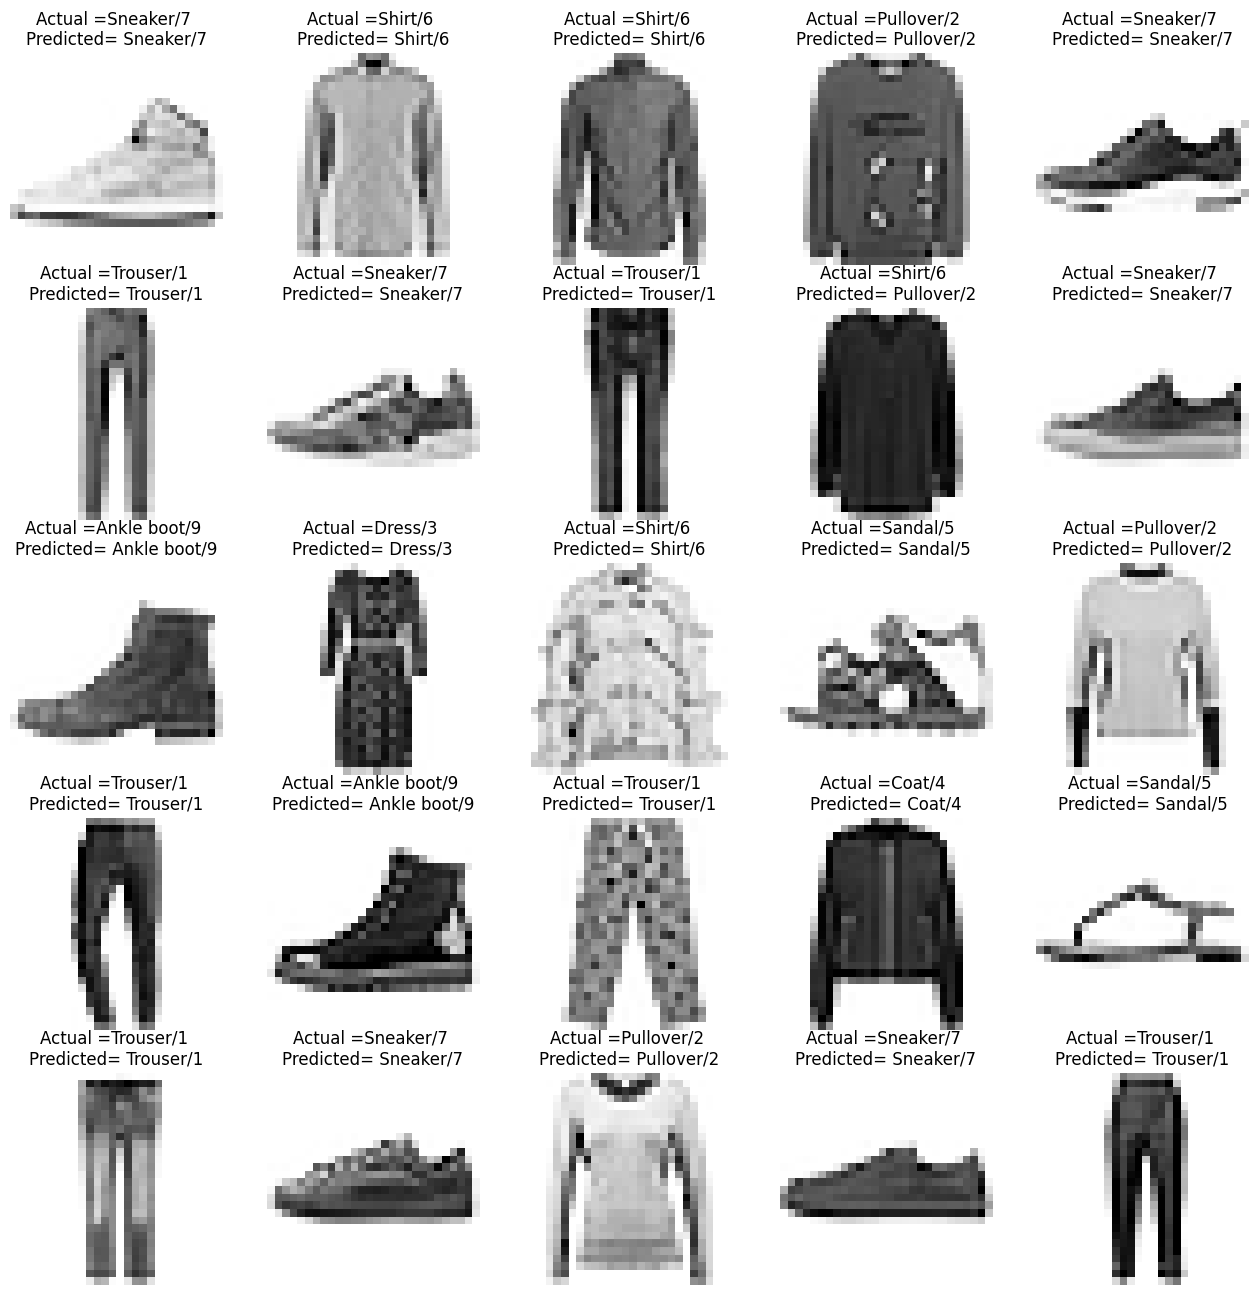

In [56]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual ={}/{} \nPredicted= {}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

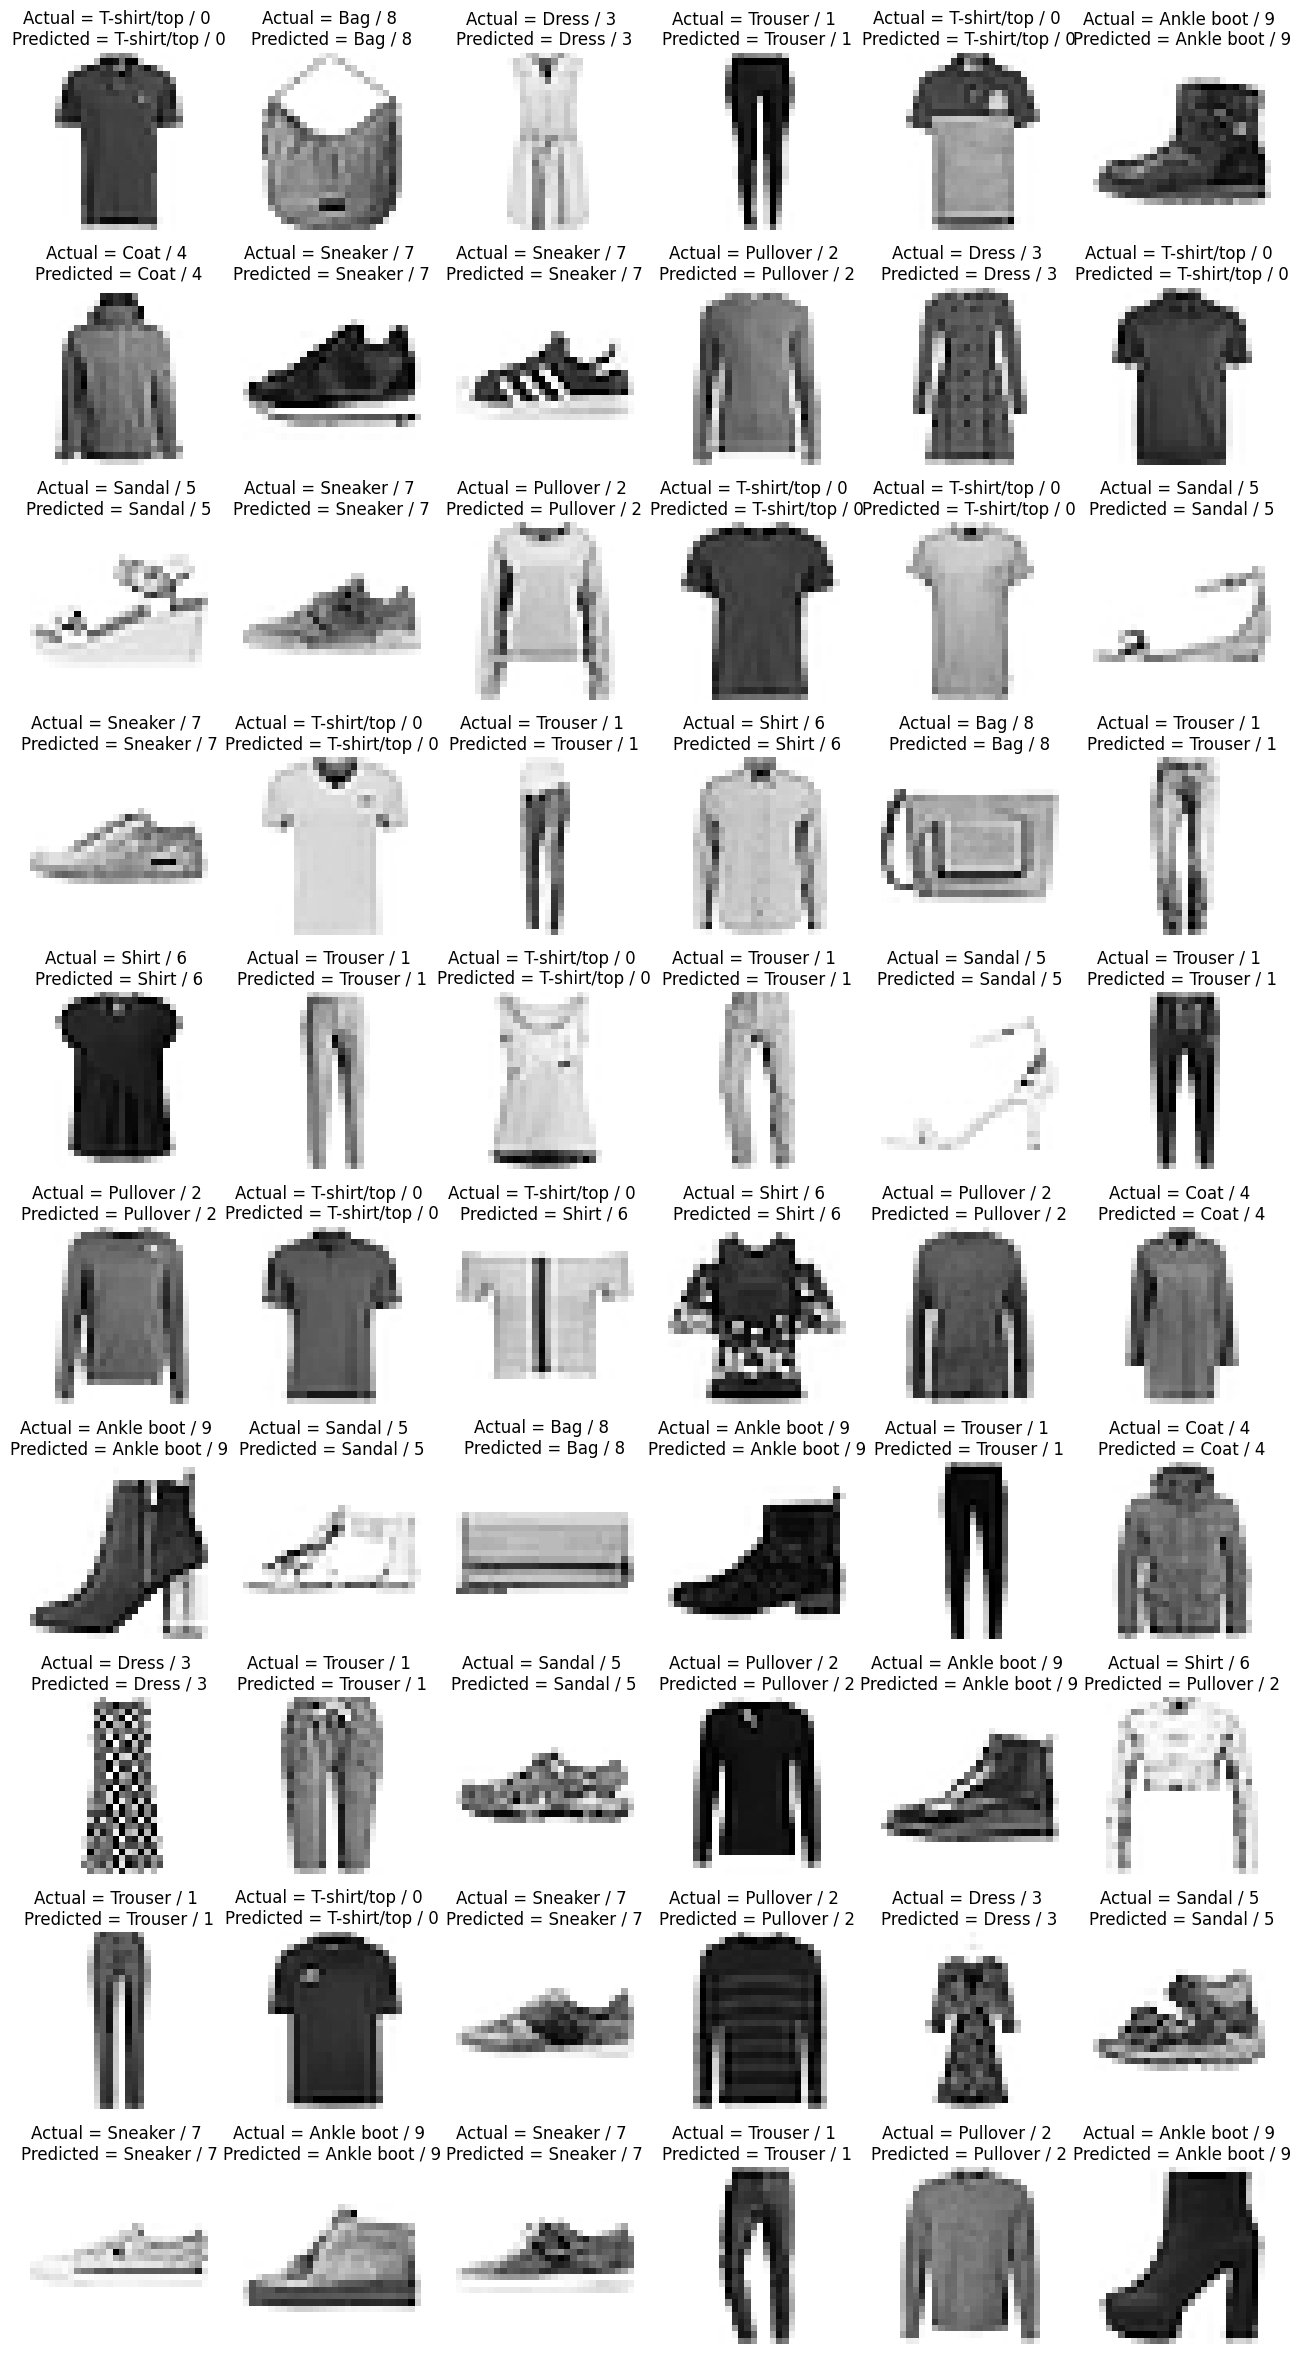

In [57]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
     

###**Confusion Matrix**

In [58]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.87      0.84      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.85      0.82      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.67      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



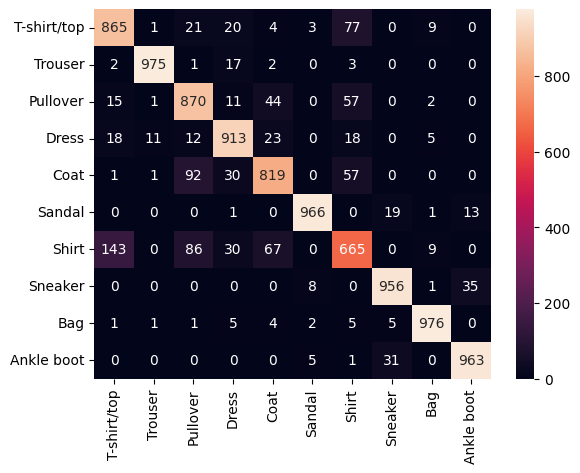

In [59]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

###**Saving Model**

In [60]:
model.save('fashion_mnist_cnn_model.h5')

##**Build 2 Complex CNN**

In [62]:
#Building CNN Model

cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
#Compile the model

cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 52s 537ms/step - loss: 1.0135 - accuracy: 0.6213 - val_loss: 0.5573 - val_accuracy: 0.7836
Epoch 2/20
94/94 [==============================] - 35s 375ms/step - loss: 0.5341 - accuracy: 0.8026 - val_loss: 0.4454 - val_accuracy: 0.8365
Epoch 3/20
94/94 [==============================] - 37s 390ms/step - loss: 0.4438 - accuracy: 0.8397 - val_loss: 0.3849 - val_accuracy: 0.8592
Epoch 4/20
94/94 [==============================] - 36s 384ms/step - loss: 0.3876 - accuracy: 0.8597 - val_loss: 0.3410 - val_accuracy: 0.8752
Epoch 5/20
94/94 [==============================] - 37s 397ms/step - loss: 0.3533 - accuracy: 0.8712 - val_loss: 0.3270 - val_accuracy: 0.8822
Epoch 6/20
94/94 [==============================] - 37s 389ms/step - loss: 0.3310 - accuracy: 0.8793 - val_loss: 0.3219 - val_accuracy: 0.8828
Epoch 7/20
94/94 [==============================] - 39s 412ms/step - loss: 0.3136 - accuracy: 0.8849 - val_loss: 0.3017 - val_accuracy: 0.8903

In [ ]:
#very complex model
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
#Complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 86s 889ms/step - loss: 1.1788 - accuracy: 0.5452 - val_loss: 0.6137 - val_accuracy: 0.7616
Epoch 2/50
94/94 [==============================] - 76s 811ms/step - loss: 0.6038 - accuracy: 0.7732 - val_loss: 0.4865 - val_accuracy: 0.8144
Epoch 3/50
94/94 [==============================] - 75s 803ms/step - loss: 0.4913 - accuracy: 0.8167 - val_loss: 0.4207 - val_accuracy: 0.8456
Epoch 4/50
94/94 [==============================] - 74s 790ms/step - loss: 0.4200 - accuracy: 0.8497 - val_loss: 0.3588 - val_accuracy: 0.8705
Epoch 5/50
94/94 [==============================] - 75s 803ms/step - loss: 0.3678 - accuracy: 0.8710 - val_loss: 0.3338 - val_accuracy: 0.8821
Epoch 6/50
94/94 [==============================] - 80s 857ms/step - loss: 0.3410 - accuracy: 0.8802 - val_loss: 0.3134 - val_accuracy: 0.8857
Epoch 7/50
94/94 [==============================] - 76s 813ms/step - loss: 0.3099 - accuracy: 0.8898 - val_loss: 0.3099 - val_accuracy: 0.8910